In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Dataset.csv")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Display basic dataset information
print("📌 Dataset Information:")
df.info()

# Display the first 5 rows
print("\n📌 First 5 Rows of the Dataset:")
print(df.head())

# Display the last 5 rows
print("\n📌 Last 5 Rows of the Dataset:")
print(df.tail())

# Display summary statistics for numerical columns
print("\n📌 Summary Statistics:")
print(df.describe())

# Check for missing values
print("\n📌 Missing Values per Column:")
print(df.isnull().sum())

# Display column names
print("\n📌 Column Names:")
print(df.columns.tolist())

# Display unique values for categorical columns (if applicable)
categorical_cols = df.select_dtypes(include=['object']).columns
print("\n📌 Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Show shape of dataset (rows, columns)
print("\n📌 Dataset Shape:")
print(df.shape)  # (rows, columns)

# Show data types
print("\n📌 Data Types of Each Column:")
print(df.dtypes)


📌 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15

In [2]:
split = df['Cuisines'].str.split(',').explode()
common_cuisine_combinations =split.value_counts()
common_cuisine_combinations.head(10)

,count
Cuisines,
North Indian,2992
Chinese,1880
Fast Food,1314
North Indian,968
Chinese,855
Mughlai,780
Fast Food,672
Bakery,621
Cafe,617


<ipython-input-9-e06da7c8d9e4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cuisines.index, y=top_10_cuisines.values, palette='viridis')


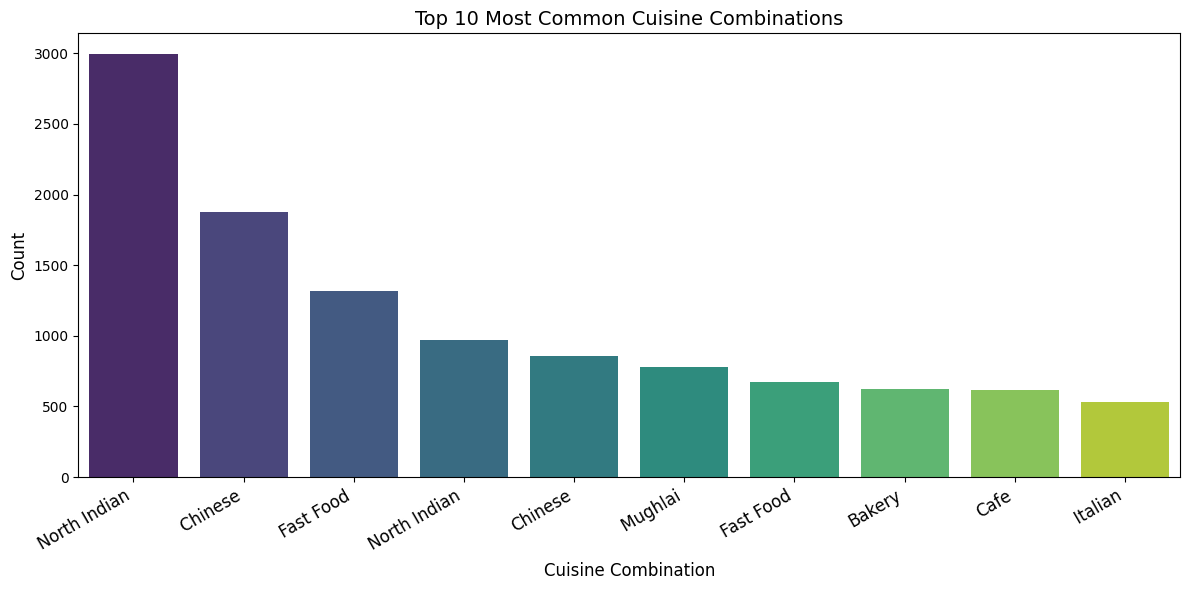

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only top 10 are selected
top_10_cuisines = common_cuisine_combinations.head(10)

plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(x=top_10_cuisines.index, y=top_10_cuisines.values, palette='viridis')

plt.xticks(rotation=30, ha='right', fontsize=12)  # Rotate labels for clarity
plt.title("Top 10 Most Common Cuisine Combinations", fontsize=14)
plt.xlabel("Cuisine Combination", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()



In [3]:
cuisines_split = df['Cuisines'].str.split(',').explode()
cuisine_ratings_df = pd.DataFrame({'Cuisine Combination':split, 'Aggregate Rating': df['Aggregate rating']})
cuisine_ratings_df = cuisine_ratings_df.dropna()
average_ratings_by_cuisine = cuisine_ratings_df.groupby('Cuisine Combination')['Aggregate Rating'].mean()
top_high_rated_cuisines = average_ratings_by_cuisine.nlargest()
top_high_rated_cuisines

,Aggregate Rating
Cuisine Combination,
Sunda,4.900000
B�_rek,4.700000
Cajun,4.700000
Scottish,4.700000
Caribbean,4.666667


<ipython-input-5-eb26e217a631>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_rated_cuisines.index, y=top_high_rated_cuisines.values, palette='magma')


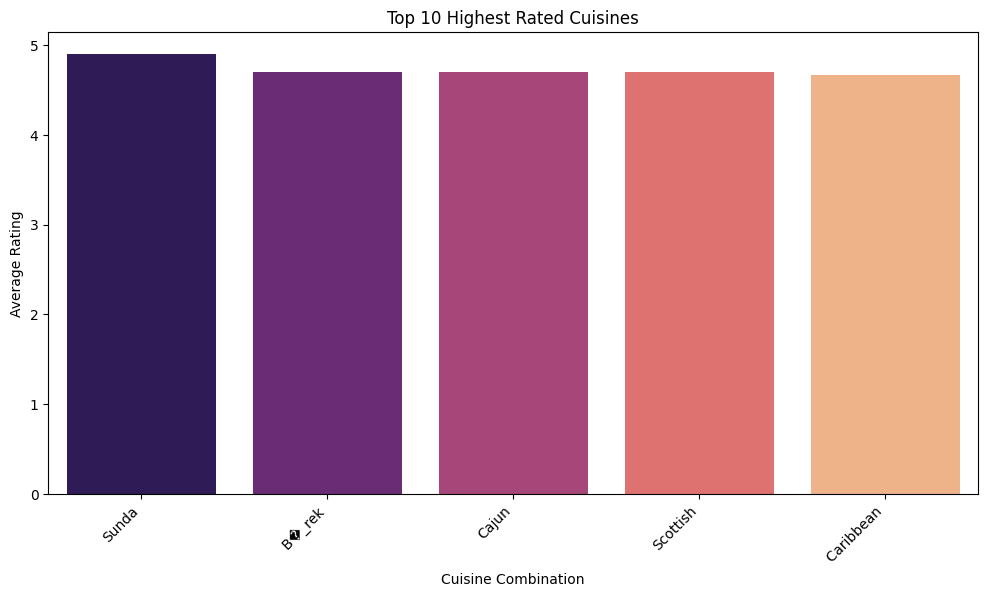

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Highest-Rated Cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=top_high_rated_cuisines.index, y=top_high_rated_cuisines.values, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Highest Rated Cuisines")
plt.xlabel("Cuisine Combination")
plt.ylabel("Average Rating")
plt.show()
